In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
import os
import glob
import random
from joblib import Parallel, delayed
import warnings
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import to_categorical



In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

Get features of the dataset to undertsand what is the exact length or count of the datasets

In [3]:
# Path where the features.txt file will be saved
features_file_path = "./MHealth Dataset/features.txt"

# Check if the file already exists
if not os.path.exists(features_file_path):
    features = [
'acceleration_chest_x',
'acceleration_chest_y',
'acceleration_chest_z',
'ECG_1',
'ECG_2',
'acceleration_left_ankle_x',
'acceleration_left_ankle_y',
'acceleration_left_ankle_z',
'gyro_left_ankle_x',
'gyro_left_ankle_y',
'gyro_left_ankle_z',
'magnetometer_left_ankle_x',
'magnetometer_left_ankle_y',
'magnetometer_left_ankle_z',
'acceleration_right_lower_arm_x',
'acceleration_right_lower_arm_y',
'acceleration_right_lower_arm_z',
'gyro_right_lower_arm_x',
'gyro_right_lower_arm_y',
'gyro_right_lower_arm_z',
'magnetometer_right_lower_arm_x',
'magnetometer_right_lower_arm_y',
'magnetometer_right_lower_arm_z',]

    # Create and write to the features.txt file
    with open(features_file_path, "w") as f:
        for i, feature in enumerate(features, start=1):
            f.write(f"{feature}\n")
    print(f"Created {features_file_path}")
else:
    print(f"{features_file_path} already exists. No file created.")


./MHealth Dataset/features.txt already exists. No file created.


In [4]:
Load_features = "./MHealth Dataset/features.txt"
with open(Load_features, "r") as f:
    features_name = f.readlines()
MHealth_Features = [line.strip() for line in features_name if line.strip()] # Removing blank lines
displayfeatures = pd.DataFrame(MHealth_Features[:23], columns=["Features of MHealth Dataset"]) #converting features to dataframe just to display here.
displayfeatures = displayfeatures.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
)
display(displayfeatures)

,Features of MHealth Dataset
0,acceleration_chest_x
1,acceleration_chest_y
2,acceleration_chest_z
3,ECG_1
4,ECG_2
5,acceleration_left_ankle_x
6,acceleration_left_ankle_y
7,acceleration_left_ankle_z
8,gyro_left_ankle_x
9,gyro_left_ankle_y


In [5]:
# activityInformation.txt file will be saved
activityInformation_file_path = "./MHealth Dataset/activityInformation.txt"
if not os.path.exists(activityInformation_file_path): #check is it exisitng or not.
    # List of activity labels
    activityInformation = [
"0 No_activity",
"1 Standing_still",
"2 Sitting_and_relaxing",
"3 Lying_down",
"4 Walking",
"5 Climbing_stairs",
"6 Waist_bends_forward",
"7 Frontal_elevation_of_arms",
"8 Knees_bending",
"9 Jogging",
"10 Jumping_front_back",
"11 Running",
"12 Cycling"]

    # Create and write to the activityInformation.txt file
    with open(activityInformation_file_path, "w") as f:
        for label in activityInformation:
            f.write(f"{label}\n")
    print(f"Created {activityInformation_file_path}")
else:
    print(f"{activityInformation_file_path} already exists. No file created.")
with open('./MHealth Dataset/activityInformation.txt', 'r') as f:
    content = f.read()

./MHealth Dataset/activityInformation.txt already exists. No file created.


In [6]:
# Load the activity mapping from the 'activityInformation.txt' file
activity_file = './MHealth Dataset/activityInformation.txt'
activity_mapping = pd.read_csv(activity_file, delim_whitespace=True, header=None, names=['ActivityID', 'ActivityName'])
activity_mapping['ActivityID'] = activity_mapping['ActivityID'].astype(int)
activity_mapping_dict = dict(zip(activity_mapping['ActivityID'], activity_mapping['ActivityName'])) #Dictionary consiting activity id and activity name

# Load feature names from feature.txt file
feature_file_path = './MHealth Dataset/features.txt'
with open(feature_file_path, 'r') as f:
    feature_names = f.read().splitlines()

column_names = ['user', 'Activity'] + feature_names
dataset = './MHealth Dataset/'

# Using glob to find all files matching the pattern "Mhealth_subject*.log" here
datafiles = glob.glob(dataset + 'mHealth_subject*.log')
emptydataframe = []
for datafile in datafiles:
    # Extract the user number from the file name, e.g., Mhealth_subject1.log -> 1 in order to append this value to my generated csv.
    user_id = ''.join([char for char in datafile if char.isdigit()]) 
    df = pd.read_csv(datafile, delim_whitespace=True, header=None)
    df[23] = pd.to_numeric(df[23], errors='coerce').astype(int)
    df[23] = df[23].map(activity_mapping_dict)
    df['User'] = int(user_id)
    cols = ['User', 23] + [col for col in df.columns if col not in [23, 'User']]
    df = df[cols]
    emptydataframe.append(df)
dataframe_finalMerged = pd.concat(emptydataframe, ignore_index=True)
dataframe_finalMerged.columns = column_names
dataframe_finalMerged.to_csv('./MHealth Dataset/Data/BaseFiles/MHealth_Cleaned_Dataset.csv', index=False, float_format='%.2f')
print("Merged dataset saved as 'MHealth_Cleaned_Dataset.csv'")
MHealth_Cleaned_Dataset = pd.read_csv('./MHealth Dataset/Data/BaseFiles/MHealth_Cleaned_Dataset.csv')
# Get the list of unique activities, excluding 'No activity'{No activity records are more than 30K which over powering 
# other records & impacting model training hence planned to drop these records and proceed with further other activities.}
activities = MHealth_Cleaned_Dataset['Activity'].unique().tolist()
activities = [activity for activity in activities if activity != 'No_activity']
MasterData__Dataset = MHealth_Cleaned_Dataset[MHealth_Cleaned_Dataset['Activity'] != 'No_activity']

# Save the modified dataset
output_csv_path = './MHealth Dataset/Data/BaseFiles/MHealth_Cleaned_Dataset.csv'
MHealth_Cleaned_Dataset.to_csv(output_csv_path, index=False, float_format='%.2f')

print(f"Modified dataset saved as {output_csv_path}")

Merged dataset saved as 'MHealth_Cleaned_Dataset.csv'
Modified dataset saved as ./MHealth Dataset/Data/BaseFiles/MHealth_Cleaned_Dataset.csv


In [7]:
file = './MHealth Dataset/Data/BaseFiles/MHealth_Cleaned_Dataset.csv'  # Update the path as necessary
MHealth_Cleaned_Dataset = pd.read_csv(file)

# Get the list of unique activities, excluding 'No activity'
activities = MHealth_Cleaned_Dataset['Activity'].unique().tolist()
activities = [activity for activity in activities if activity != 'No activity']
# Filter out rows where the Activity column is 'No activity'
MHealth_Cleaned_Dataset = MHealth_Cleaned_Dataset[MHealth_Cleaned_Dataset['Activity'] != 'No activity']
MHealth_Cleaned_Dataset.reset_index(drop=True, inplace=True)
# Save the modified dataset
output = './MHealth Dataset/Data/BaseFiles/MHealth_Cleaned_Dataset.csv'  # Update the path as necessary
MHealth_Cleaned_Dataset.to_csv(output, index=False, float_format='%.2f')
print(f"Modified dataset saved as {output}")


Modified dataset saved as ./MHealth Dataset/Data/BaseFiles/MHealth_Cleaned_Dataset.csv


In [8]:
MasterData = pd.read_csv('./MHealth Dataset/Data/BaseFiles/MHealth_Cleaned_Dataset.csv')
# check if they have null or duplicates values
print('Total Number of records excluding header {}'.format(MasterData.shape))
print('Number of test duplicate data = {}'.format(sum(MasterData.duplicated())))
print('Null Values = {}'.format(MasterData.isnull().values.sum()))

Total Number of records excluding header (50000, 25)
Number of test duplicate data = 0
Null Values = 0


In [9]:
# train and test data as per 80% and 20% distribution of master data.
print("Number of MHealth_Cleaned_Dataset Rows and Columns:", MasterData.shape) 
# Getting n random records from the data(just to see how data looks before distribution.)
MHealth_Cleaned_Dataset_Random_Data = MHealth_Cleaned_Dataset.sample(n=20, random_state=42)
MHealth_Cleaned_Dataset_Random_Data_Display = MHealth_Cleaned_Dataset_Random_Data.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
).format(precision=2)
display(MHealth_Cleaned_Dataset_Random_Data)

Number of MHealth_Cleaned_Dataset Rows and Columns: (50000, 25)


,user,Activity,acceleration_chest_x,acceleration_chest_y,acceleration_chest_z,ECG_1,ECG_2,acceleration_left_ankle_x,acceleration_left_ankle_y,acceleration_left_ankle_z,...,magnetometer_left_ankle_z,acceleration_right_lower_arm_x,acceleration_right_lower_arm_y,acceleration_right_lower_arm_z,gyro_right_lower_arm_x,gyro_right_lower_arm_y,gyro_right_lower_arm_z,magnetometer_right_lower_arm_x,magnetometer_right_lower_arm_y,magnetometer_right_lower_arm_z
33553,6,No_activity,-8.95,-1.39,-1.62,-0.17,-0.12,-0.98,-10.37,-1.28,...,-2.38,-4.00,-8.71,1.90,-0.60,-0.52,0.78,4.86,0.88,-16.16
9427,10,Running,-0.35,-0.90,-0.79,-0.15,-0.11,-1.44,1.28,-18.24,...,-4.04,12.36,-13.09,-3.32,-0.42,0.01,1.07,-19.78,15.04,-131.23
199,1,No_activity,-9.71,0.59,0.12,0.12,0.18,-0.53,-9.73,-2.78,...,-3.25,-7.33,-4.59,5.96,-0.71,0.17,0.88,5.47,-9.13,-17.85
12447,2,No_activity,-13.64,-0.27,2.31,-0.18,0.00,0.11,-13.85,0.34,...,10.52,-7.42,3.80,4.40,-0.77,-0.56,0.43,16.07,9.27,-18.54
39489,7,No_activity,-9.52,-1.10,-1.71,0.00,0.02,1.45,-9.67,1.58,...,-6.54,-0.59,-9.12,3.44,-0.73,-0.83,0.02,-1.19,-11.56,4.06
42724,8,No_activity,-9.42,-1.09,2.45,-0.65,-0.52,2.09,-9.74,-0.72,...,0.16,-7.22,-2.83,6.01,-0.52,-0.82,0.08,5.26,5.03,0.05
10822,2,Sitting_and_relaxing,-8.23,-1.30,4.67,-0.17,-0.15,2.80,-7.37,-6.16,...,-0.29,-5.49,-1.90,7.63,-0.72,0.75,0.85,0.00,0.17,-0.72
49498,9,Climbing_stairs,-5.98,-0.62,-2.00,-0.06,-0.05,1.69,-9.17,-0.21,...,2.27,-2.24,-4.82,1.59,-0.79,-0.85,0.37,26.56,16.60,89.53
4144,1,No_activity,-8.51,-0.85,-3.95,-0.32,-0.64,1.64,-9.85,0.89,...,-7.24,-17.01,-5.40,-0.60,-0.48,-0.88,-0.40,-25.43,-65.90,208.81
36958,7,No_activity,-9.14,-1.47,-2.02,-0.21,-0.19,1.84,-9.38,1.61,...,-0.40,-8.78,2.47,4.43,-1.05,0.01,-0.08,-4.28,3.31,-0.12


In [10]:
def plotGraphs(masterdataset,graph_name,title,x_label,y_label):
    
    match graph_name:
        case 'ACTIVITIES PERFORMED BY EACH USER':
           plt.figure(figsize=(14, 8))
           sns.countplot(masterdataset, x='user', hue='Activity')
           plt.title(title, fontsize=16)
           plt.legend(title='ACTIVITIES', bbox_to_anchor=(1.05, 1), loc='upper left')
        case 'EACH ACTIVITY DONE BY USERS':
            plt.figure(figsize=(10, 8))
            label_counts = masterdataset['Activity'].value_counts()
            palette = sns.color_palette("viridis", len(label_counts))
            sns.barplot(x=label_counts.index.str.capitalize(), y=label_counts.values, palette=palette)
            plt.title(title, fontsize=16)
        case 'FEATURE FOR STATIONARY VS MOVING ACTIVITY':
              plt.figure(figsize=(5, 5))
              sns.kdeplot(masterdataset, x= MHealth_feature, hue='Activity', fill=True, common_norm=False, palette='muted')
              plt.title(f'Density Plot of {MHealth_feature} for Stationary vs Moving Activities', fontsize=16)
              plt.legend(title='Activity Type')
              plt.tight_layout()
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

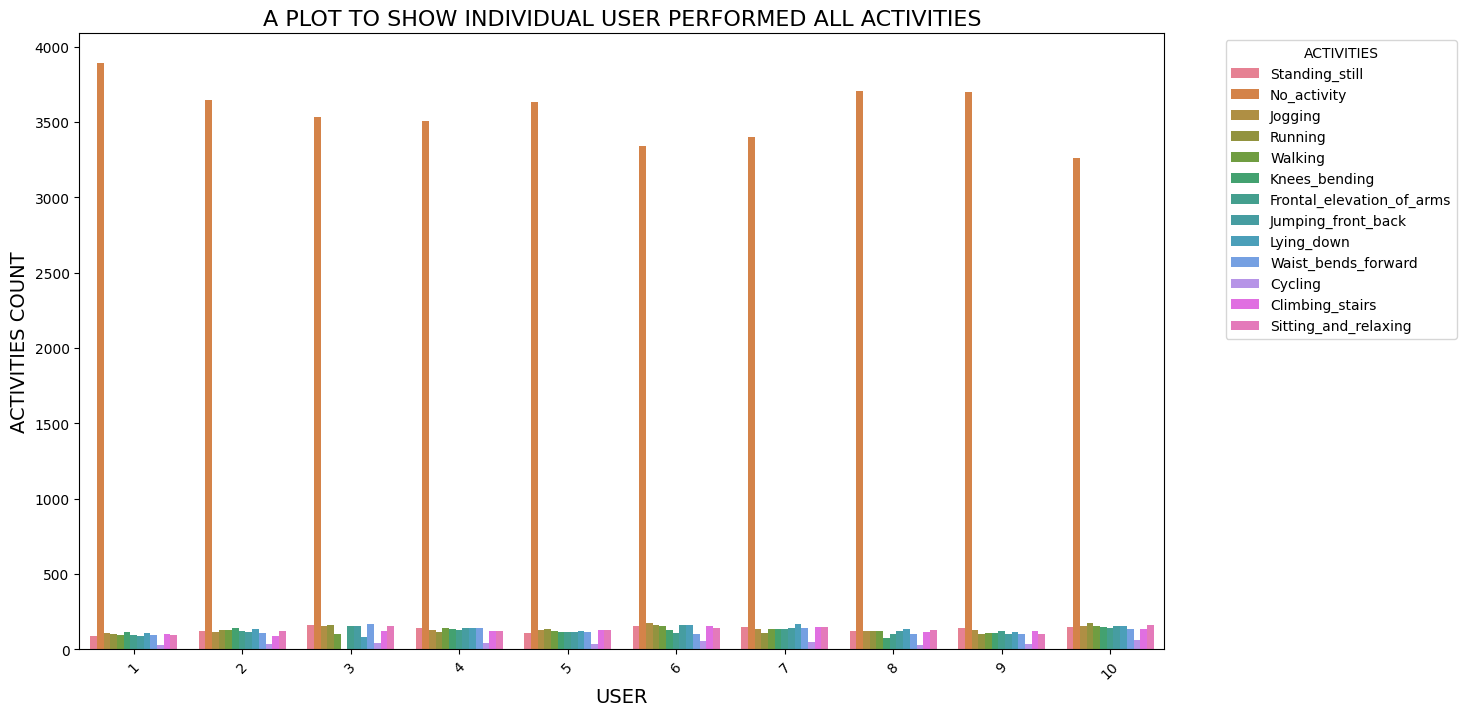

In [11]:
plotGraphs(MasterData,'ACTIVITIES PERFORMED BY EACH USER','A PLOT TO SHOW INDIVIDUAL USER PERFORMED ALL ACTIVITIES','USER','ACTIVITIES COUNT')

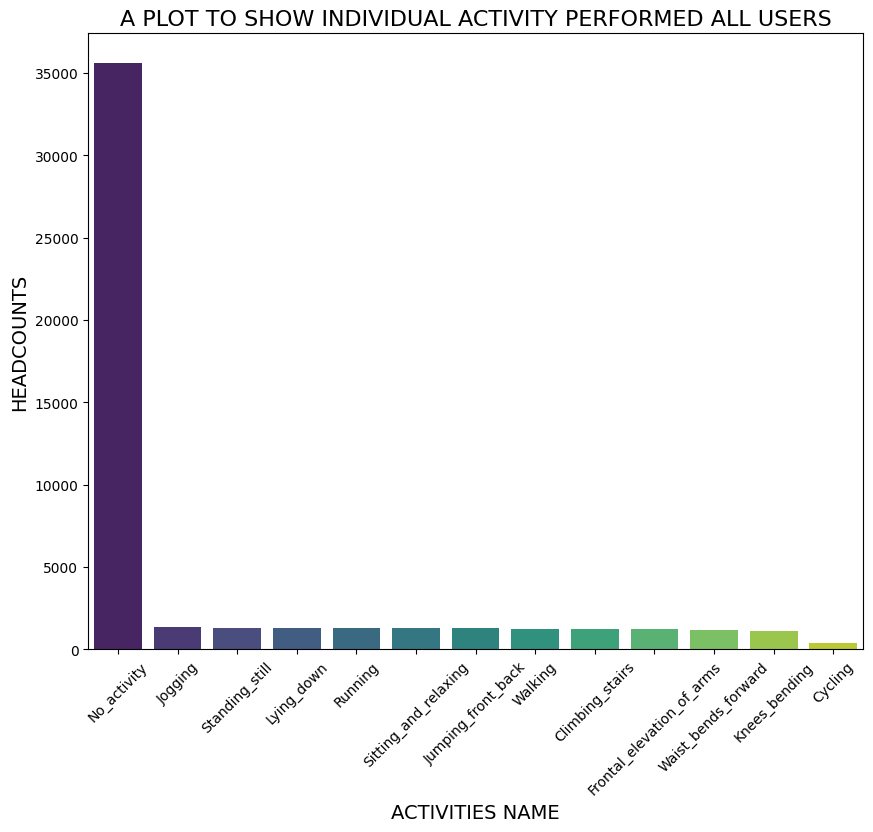

In [12]:
plotGraphs(MasterData,'EACH ACTIVITY DONE BY USERS','A PLOT TO SHOW INDIVIDUAL ACTIVITY PERFORMED ALL USERS','ACTIVITIES NAME','HEADCOUNTS')

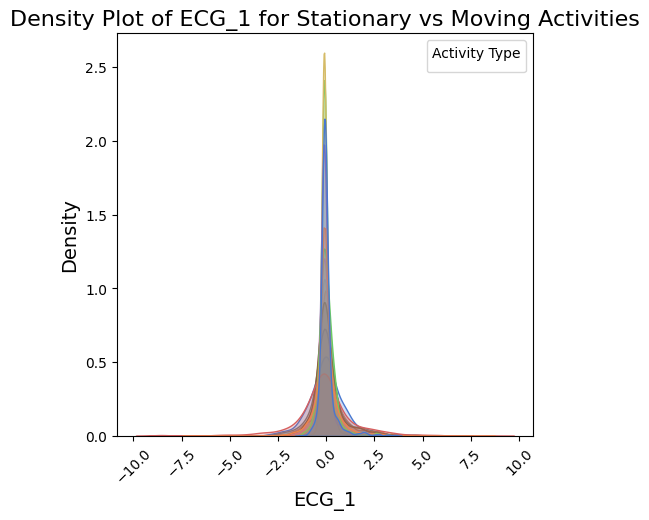

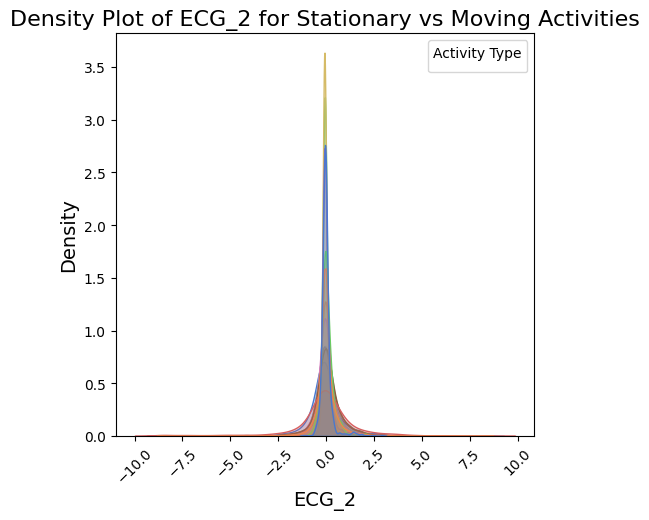

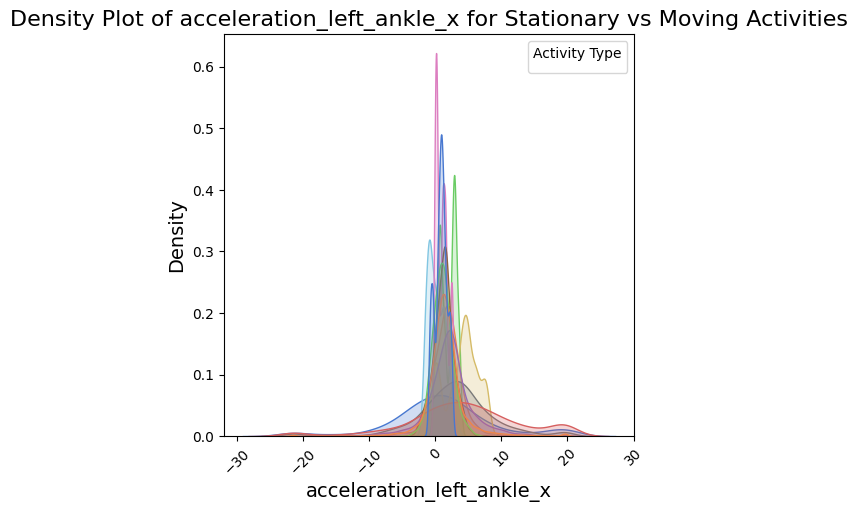

In [13]:
MHealth_Selected_Features = ['ECG_1', 'ECG_2', 'acceleration_left_ankle_x'] #Graphs to show features maps between stationary vs moving activities for any 3 feature.
for MHealth_feature in MHealth_Selected_Features:
    plotGraphs(MasterData,'FEATURE FOR STATIONARY VS MOVING ACTIVITY',f'Density Plot of {MHealth_feature} for Stationary vs Moving Activities',MHealth_feature,'Density')

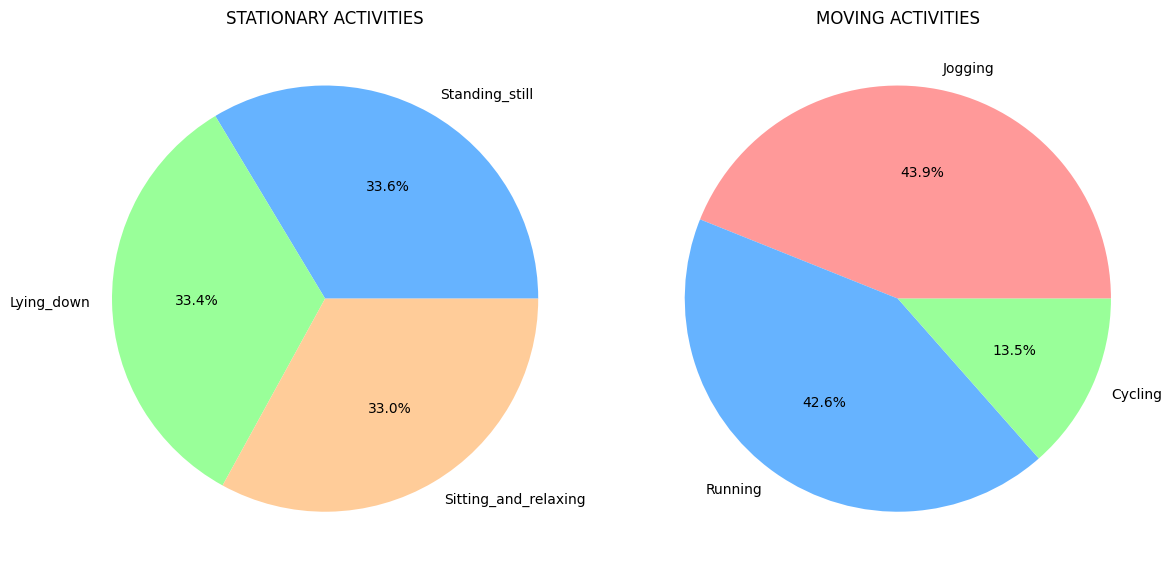

In [14]:
# Define stationary and moving activities
MHealth_Stationary_Activities = ['Standing_still', 'Sitting_and_relaxing', 'Lying_down']
MHealth_Moving_Activities = ['Running', 'Cycling', 'Jogging']
MasterData['ActivityCategory'] = MasterData['Activity'].apply(
    lambda x: 'Stationary' if x in MHealth_Stationary_Activities else ('Moving' if x in MHealth_Moving_Activities else 'Other')
)
MHealth_Stationary_Activities_Counts = MasterData[MasterData['ActivityCategory'] == 'Stationary']['Activity'].value_counts()
MHealth_Moving_Activities_Counts = MasterData[MasterData['ActivityCategory'] == 'Moving']['Activity'].value_counts()

# Plotting pie charts for stationary and moving activities
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Stationary activities pie chart
axs[0].pie(
    MHealth_Stationary_Activities_Counts,
    labels=MHealth_Stationary_Activities_Counts.index,
    autopct='%1.1f%%',
    colors=['#66b3ff', '#99ff99', '#ffcc99']
)
axs[0].set_title('STATIONARY ACTIVITIES')

# Moving activities pie chart
axs[1].pie(
    MHealth_Moving_Activities_Counts,
    labels=MHealth_Moving_Activities_Counts.index,
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff', '#99ff99']
)
axs[1].set_title('MOVING ACTIVITIES')
plt.tight_layout()
plt.show()


In [15]:
MHealth_NumerCol = MasterData.select_dtypes(include=['float64', 'int64']).columns
MHealth_IntVal = MasterData[MHealth_NumerCol]
MHealthDataStat = MHealth_IntVal.describe().T
variance = MHealth_IntVal.var()
skewness = MHealth_IntVal.skew()
kurtosis = MHealth_IntVal.kurt()
DataFrame_MHealthDataStat = pd.DataFrame({
    'MEAN': MHealthDataStat['mean'],
    'STD': MHealthDataStat['std'],
    'MIN': MHealthDataStat['min'],
    '25%': MHealthDataStat['25%'],
    '50%': MHealthDataStat['50%'],
    '75%': MHealthDataStat['75%'],
    'MAX': MHealthDataStat['max'],
    'VARIANCE': variance,
    'SKEWNESS': skewness,
    'KURTOSIS': kurtosis
})

# save the dataframe to a CSV file
DataFrame_MHealthDataStat.to_csv('./MHealth Dataset/Data/BaseFiles/MHealth_DataStat_Analysis.csv', index=False)
MHealthDataStat_Display = DataFrame_MHealthDataStat.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
).format(precision=2)
display(MHealthDataStat_Display)

,MEAN,STD,MIN,25%,50%,75%,MAX,VARIANCE,SKEWNESS,KURTOSIS
user,5.50,2.87,1.00,3.00,5.50,8.00,10.00,8.25,0.00,-1.22
acceleration_chest_x,-8.52,4.09,-22.30,-9.80,-9.31,-7.61,18.97,16.72,0.53,3.90
acceleration_chest_y,-0.22,2.18,-19.93,-1.28,-0.38,0.72,20.93,4.77,0.28,6.71
acceleration_chest_z,-1.15,3.59,-18.39,-2.97,-0.97,0.55,19.47,12.92,0.09,2.05
ECG_1,-0.00,0.74,-8.62,-0.23,-0.08,0.15,8.50,0.54,0.85,14.52
ECG_2,-0.00,0.71,-8.62,-0.19,-0.05,0.14,8.50,0.51,-0.84,33.22
acceleration_left_ankle_x,1.52,3.78,-22.12,0.12,1.30,2.59,20.04,14.27,0.09,10.71
acceleration_left_ankle_y,-9.66,4.22,-19.59,-10.21,-9.67,-9.01,21.05,17.81,0.54,4.50
acceleration_left_ankle_z,-0.89,5.52,-19.36,-2.61,0.05,1.39,24.84,30.47,-0.54,3.81
gyro_left_ankle_x,0.00,0.48,-1.88,-0.43,0.00,0.44,1.79,0.23,-0.02,-1.13


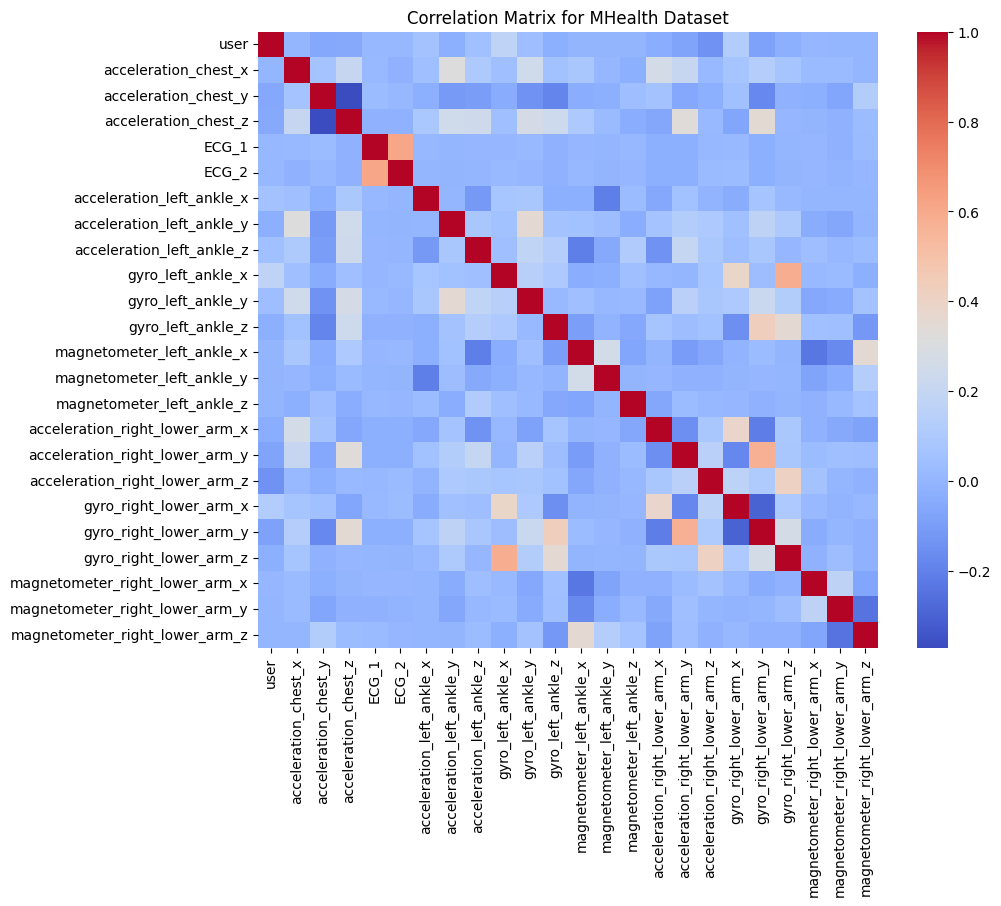

In [16]:
MHealth_NumerCol = MasterData.select_dtypes(include=['float64', 'int64']).columns
MHealth_IntVal = MasterData[MHealth_NumerCol]
MHealth_Correlation_Matrix = MHealth_IntVal.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(MHealth_Correlation_Matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for MHealth Dataset')
plt.show()


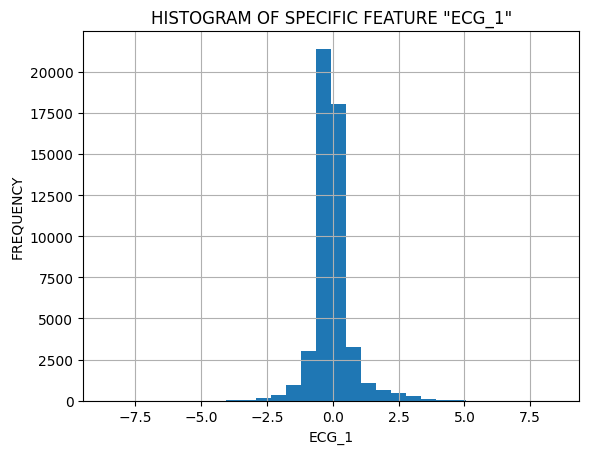

In [17]:
MasterData['ECG_1'].hist(bins=30)
plt.title('HISTOGRAM OF SPECIFIC FEATURE "ECG_1"')
plt.xlabel('ECG_1')
plt.ylabel('FREQUENCY')
plt.show()

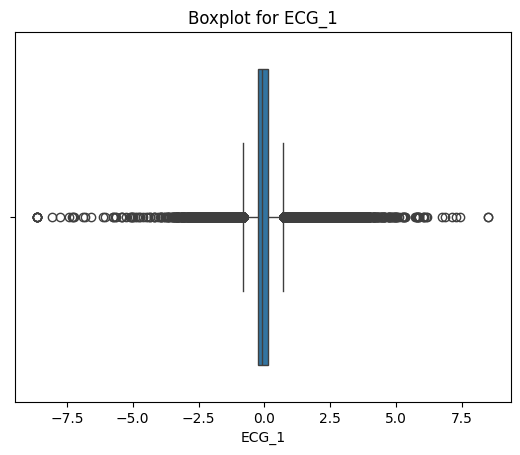

In [18]:
# Boxplot for a specific feature to detect outliers
sns.boxplot(x=MasterData['ECG_1'])
plt.title('Boxplot for ECG_1')
plt.show()

In [19]:
MHealth_X_Data = MasterData.drop(columns=['Activity'])
MHealth_Y_Data = MasterData['Activity']
MHealth_Label_Encoder = LabelEncoder()
MHealth_Y_Encoded = MHealth_Label_Encoder.fit_transform(MHealth_Y_Data)

#Split the dataset into 80% train and 20% test data
MasterData_X_Train, MasterData_X_Test,MasterData_Y_Train, MasterData_Y_Test = train_test_split(
    MHealth_X_Data, MHealth_Y_Encoded, test_size=0.2, random_state=42
)

MHealth_Label_Encoders = {}
for column in MasterData_X_Train.columns:
    if MasterData_X_Train[column].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        MasterData_X_Train[column] = le.fit_transform(MasterData_X_Train[column])
        MasterData_X_Test[column] = le.transform(MasterData_X_Test[column])
        MHealth_Label_Encoders[column] = le  
print("MHealth dataset has been splitted successfully.")


MHealth dataset has been splitted successfully.


In [20]:
def trainAndtestdatasheet(modelsName, MasterData_X_Train, MasterData_X_Test):
    if modelsName == 'LSTM':
        MHealth_X_Train = np.expand_dims(MasterData_X_Train, axis=1)
        MHealth_X_Test = np.expand_dims(MasterData_X_Test, axis=1)
    else:
        MHealth_X_Train = np.expand_dims(MasterData_X_Train, axis=-1)
        MHealth_X_Test = np.expand_dims(MasterData_X_Test, axis=-1)

    return MHealth_X_Train, MHealth_X_Test


In [21]:
#Consolidating all results in single csv(accuracy,F1 Score)
def getAccuracyAndF1Score(Base,ModelName,Accuracy,F1Score):
    if not os.path.exists('./MHealth Dataset/results'):
        os.makedirs('./MHealth Dataset/results')

    result = {
        "Methodolgy":Base,
        "Model": ModelName,
        "Accuracy": Accuracy,
        "F1 Score": F1Score
    }
    file_path = './MHealth Dataset/results/results.csv'
    df_result = pd.DataFrame([result])
    if os.path.exists(file_path):
        df_result.to_csv(file_path, mode='a', header=False, index=False)
    else:
        df_result.to_csv(file_path, mode='w', header=True, index=False)
        print(f"File {file_path} created and results logged.")

In [22]:

def TrainingModelAndGeneratingReport(TrainingModelName,ModelsName):
    ModelAccuracy = 0.0
    ModelClassificationDataFrame = pd.DataFrame
    MHealth_X_Train, MHealth_X_Test = trainAndtestdatasheet(ModelsName,MasterData_X_Train, MasterData_X_Test)
    if (ModelsName =='LSTM' or ModelsName =='CNN'):  
        TrainingModelName.fit(MHealth_X_Train, MasterData_Y_Train, epochs=3,batch_size=16,validation_data=(MHealth_X_Test, MasterData_Y_Test))
        MHealth_Evaluation = TrainingModelName.evaluate(MHealth_X_Test, MasterData_Y_Test)
        ModelPrediction = np.argmax(TrainingModelName.predict(MHealth_X_Test), axis=-1)
        ModelClassificationReport = classification_report(MasterData_Y_Test, ModelPrediction, output_dict=True)
        ModelClassificationDataFrame = pd.DataFrame(ModelClassificationReport).transpose()
        ModelClassificationDataFrame.loc['accuracy'] = [MHealth_Evaluation[1] * 100, '-', '-', '-']
        ModelAccuracy = accuracy_score(MasterData_Y_Test, ModelPrediction) * 100
        ModelF1Score = f1_score(MasterData_Y_Test, ModelPrediction, average='weighted')
    else:
        TrainingModelName.fit(MasterData_X_Train, MasterData_Y_Train)
        ModelPrediction = TrainingModelName.predict(MasterData_X_Test)
        ModelAccuracy = accuracy_score(MasterData_Y_Test, ModelPrediction) * 100
        ModelF1Score = f1_score(MasterData_Y_Test, ModelPrediction, average='weighted')
        ModelClassificationReport = classification_report(MasterData_Y_Test, ModelPrediction, output_dict=True)
        ModelClassificationDataFrame = pd.DataFrame(ModelClassificationReport).transpose()
        ModelClassificationDataFrame.loc['accuracy'] = [ModelAccuracy, '-', '-', '-']

    ModelClassificationDataFrame = ModelClassificationDataFrame.round(2)
    ModelClassificationDataFrame.columns = [col.upper() for col in ModelClassificationDataFrame.columns]
    ModelClassificationDataFrame.index = [idx.upper() for idx in ModelClassificationDataFrame.index]
    getAccuracyAndF1Score('Base Class',ModelsName,ModelAccuracy,ModelF1Score)
    #Displaying report
    Classification_Report_Display = ModelClassificationDataFrame.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
    ).format(precision=2)
    display(ModelsName+': Classification Report.')
    display(Classification_Report_Display)

    #Putting confusion matrix
    ModelConfusionmatrix= confusion_matrix(MasterData_Y_Test, ModelPrediction)
    plt.figure(figsize=(10, 8))
    sns.heatmap(ModelConfusionmatrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(MasterData_Y_Train), yticklabels=np.unique(MasterData_Y_Train))
    plt.title(ModelsName + ' MHealth : Confusion Matrix')
    plt.xlabel('PREDICTED LABEL')
    plt.ylabel('TRUE LABEL')
    plt.show()

In [23]:
def callModels(ModelsName):
    print("\033[1;34m.....................................................!\033[0m")
    print('Running for '+ModelsName+'.....................>>>>>')
    print("\033[1;34m.....................................................!\033[0m")
    MHealth_X_Train, MHealth_X_Test = trainAndtestdatasheet(ModelsName,MasterData_X_Train, MasterData_X_Test)
    match ModelsName.upper():
        case 'RANDOM FOREST':
            TrainingModelName = RandomForestClassifier(
            n_estimators=3,              
            max_depth=3,                
            min_samples_split=20,        
            min_samples_leaf=10,         
            random_state=42
            )
           
            TrainingModelAndGeneratingReport(TrainingModelName,ModelsName)
            
        case 'SVM':
            scaler = StandardScaler()
            MHealth_X_Train = scaler.fit_transform(MasterData_X_Train)
            MHealth_X_Test = scaler.transform(MasterData_X_Test)
            class_weights = {i: np.random.uniform(0.1, 1.0) for i in np.unique(MasterData_Y_Train)}
            TrainingModelName = LinearSVC(
                random_state=42, 
                max_iter=300,            
                C=0.01,                  
                penalty='l1',            
                dual=False,
                class_weight=class_weights
            )
            TrainingModelAndGeneratingReport(TrainingModelName,ModelsName)
        case 'LSTM':
            TrainingModelName = models.Sequential([
            layers.LSTM(16, input_shape=(MHealth_X_Train.shape[1], MHealth_X_Train.shape[2]), 
                        kernel_regularizer=regularizers.l2(0.01)), 
            layers.Dropout(0.6),
            layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)), 
            layers.Dense(len(np.unique(MasterData_Y_Train)), activation='softmax')
        ])
            TrainingModelName.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            TrainingModelAndGeneratingReport(TrainingModelName,ModelsName)

        case 'CNN': 
            TrainingModelName = models.Sequential([
            layers.Conv1D(16, kernel_size=3, activation='relu', input_shape=(MHealth_X_Train.shape[1], 1), 
                        kernel_regularizer=regularizers.l2(0.001)),
            layers.MaxPooling1D(pool_size=2),
            layers.Dropout(0.5),  #dropout for regularization
            layers.Conv1D(32, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
            layers.MaxPooling1D(pool_size=2),
            layers.Flatten(),
            layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
            layers.Dropout(0.5), 
            layers.Dense(len(np.unique(MasterData_Y_Train)), activation='softmax')
        ])
            TrainingModelName.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            TrainingModelAndGeneratingReport(TrainingModelName,ModelsName)
            
    

........................TRAINING BASE WITH RAW DATA.............................!
.....................................................!
Running for RANDOM FOREST.....................>>>>>
.....................................................!
File ./MHealth Dataset/results/results.csv created and results logged.


'RANDOM FOREST: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
0,0.00,0.00,0.00,255.00
1,0.00,0.00,0.00,75.00
2,0.00,0.00,0.00,239.00
3,0.00,0.00,0.00,289.00
4,0.00,0.00,0.00,276.00
5,0.00,0.00,0.00,229.00
6,0.74,1.00,0.85,257.00
7,0.77,0.99,0.87,7103.00
8,0.68,0.24,0.35,273.00
9,0.83,0.68,0.75,249.00


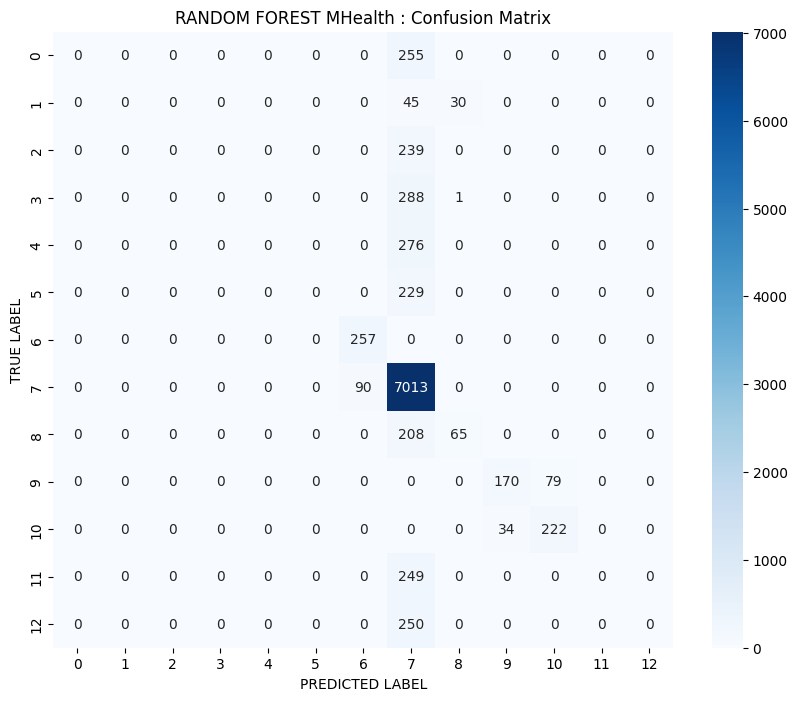

.....................................................!
Running for SVM.....................>>>>>
.....................................................!


'SVM: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
0,0.00,0.00,0.00,255.00
1,0.00,0.00,0.00,75.00
2,0.00,0.00,0.00,239.00
3,1.00,0.03,0.06,289.00
4,0.00,0.00,0.00,276.00
5,0.00,0.00,0.00,229.00
6,0.98,1.00,0.99,257.00
7,0.76,1.00,0.86,7103.00
8,0.94,0.62,0.75,273.00
9,0.00,0.00,0.00,249.00


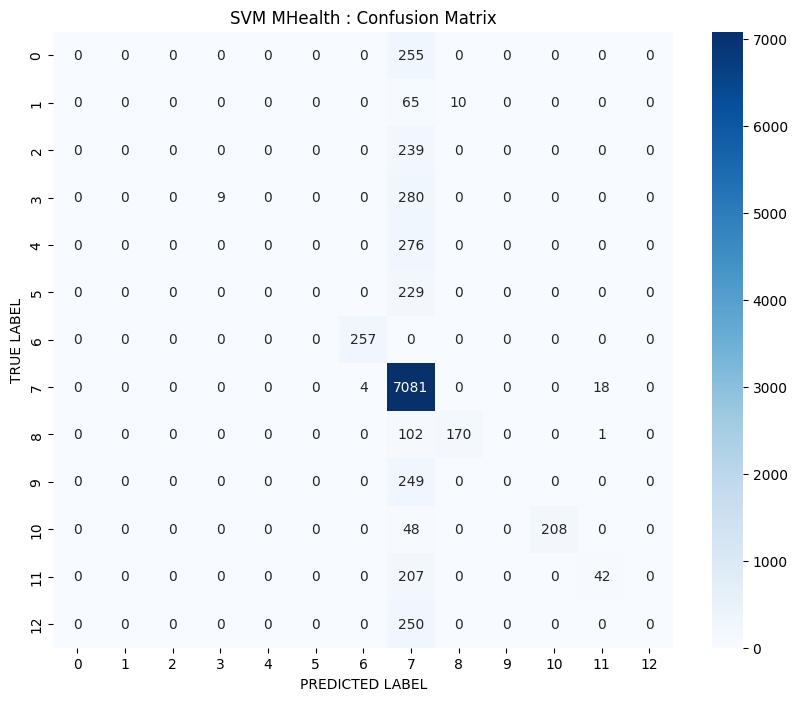

.....................................................!
Running for LSTM.....................>>>>>
.....................................................!
Epoch 1/3
2500/2500 [==============================] - 3s 882us/step - loss: 1.3357 - accuracy: 0.7107 - val_loss: 1.0670 - val_accuracy: 0.7266
Epoch 2/3
2500/2500 [==============================] - 2s 785us/step - loss: 1.0586 - accuracy: 0.7322 - val_loss: 0.8932 - val_accuracy: 0.7640
Epoch 3/3
313/313 [==============================] - 0s 422us/step


'LSTM: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
0,0.00,0.00,0.00,255.00
1,0.00,0.00,0.00,75.00
2,0.00,0.00,0.00,239.00
3,1.00,0.09,0.17,289.00
4,0.00,0.00,0.00,276.00
5,0.00,0.00,0.00,229.00
6,0.88,1.00,0.94,257.00
7,0.77,1.00,0.87,7103.00
8,0.00,0.00,0.00,273.00
9,1.00,0.86,0.93,249.00


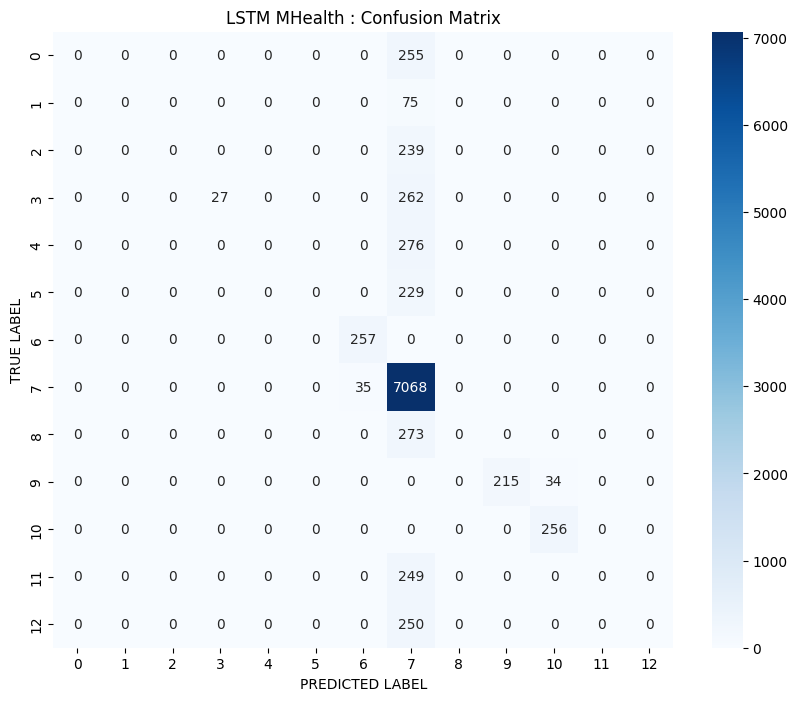

.....................................................!
Running for CNN.....................>>>>>
.....................................................!
Epoch 1/3
2500/2500 [==============================] - 2s 779us/step - loss: 1.5415 - accuracy: 0.7041 - val_loss: 1.0718 - val_accuracy: 0.7191
Epoch 2/3
2500/2500 [==============================] - 2s 745us/step - loss: 1.0774 - accuracy: 0.7234 - val_loss: 0.9346 - val_accuracy: 0.7264
Epoch 3/3
313/313 [==============================] - 0s 413us/step


'CNN: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
0,0.00,0.00,0.00,255.00
1,0.00,0.00,0.00,75.00
2,1.00,0.01,0.02,239.00
3,0.00,0.00,0.00,289.00
4,0.00,0.00,0.00,276.00
5,0.00,0.00,0.00,229.00
6,0.71,0.89,0.79,257.00
7,0.73,0.98,0.84,7103.00
8,1.00,0.01,0.02,273.00
9,0.00,0.00,0.00,249.00


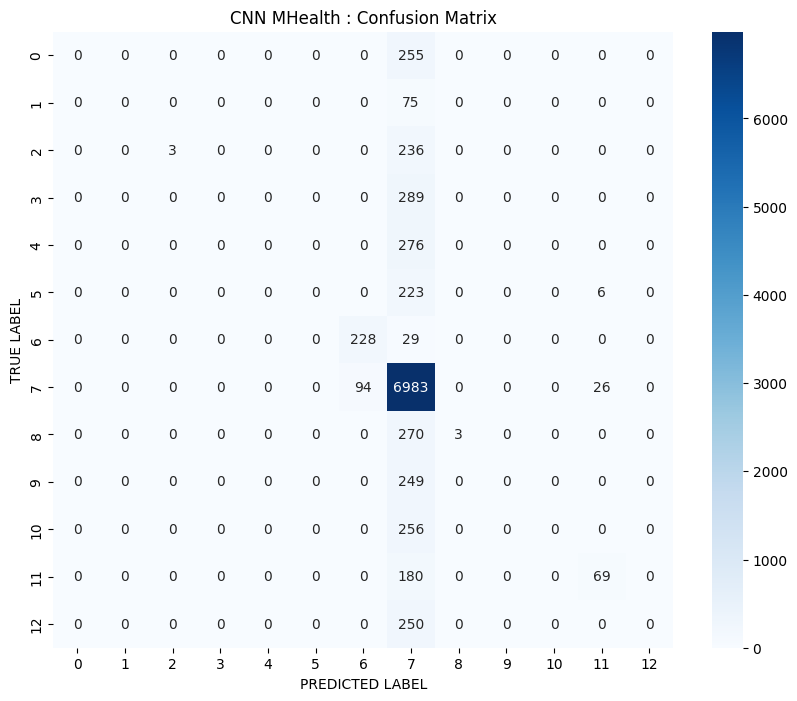

In [24]:
file_path = './MHealth Dataset/results/results.csv'
if os.path.exists(file_path):
   os.remove(file_path)
print("\033[1;32m........................TRAINING BASE WITH RAW DATA.............................!\033[0m")
callModels('RANDOM FOREST')
callModels('SVM')
callModels('LSTM')
callModels('CNN')

(350000, 25)
Number of duplicates in the augmented dataset: 79983
Number of null values in the augmented dataset: 0
Duplicates or null values found.
Shape after removing duplicates: (270017, 25)
MHealth dataset has been splitted successfully.


,ACTIVITY,HEADCOUNTS
0,7,199478
1,3,7566
2,10,7470
3,6,7420
4,8,7330
5,9,7330
6,4,7286
7,12,7051
8,0,6966
9,2,6815


,ACTIVITY,HEADCOUNTS
0,7,199478
1,11,199478
2,1,199478
3,8,199478
4,9,199478
5,2,199478
6,6,199478
7,3,199478
8,12,199478
9,4,199478


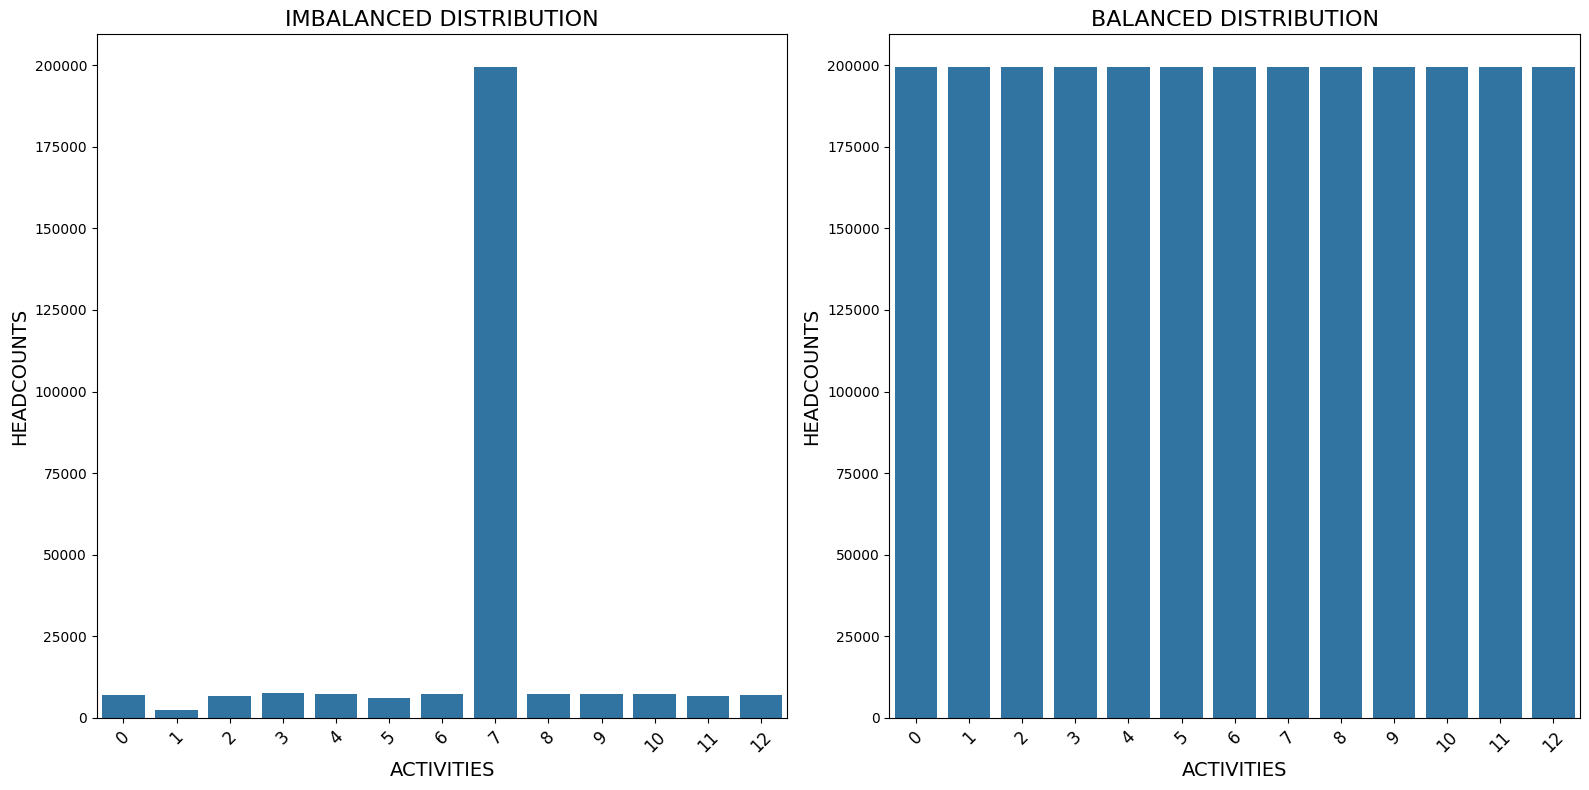

.........................TRAINING TRADITIONAL............................!
.....................................................!
Running for Traditional RANDOM FOREST.....................>>>>>
.....................................................!


'RANDOM FOREST: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
0,0.00,0.00,0.00,1742.00
1,0.00,0.00,0.00,581.00
2,0.00,0.00,0.00,1704.00
3,0.00,0.00,0.00,1891.00
4,0.00,0.00,0.00,1821.00
5,0.00,0.00,0.00,1548.00
6,0.62,0.70,0.66,1855.00
7,0.72,0.99,0.83,49869.00
8,0.00,0.00,0.00,1833.00
9,0.00,0.00,0.00,1833.00


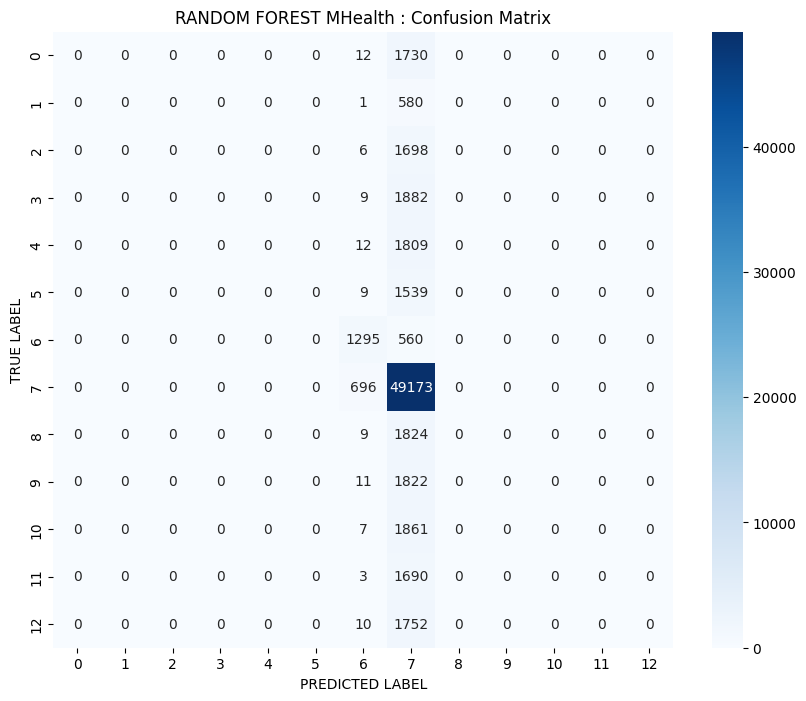

.....................................................!
Running for Traditional LSTM.....................>>>>>
.....................................................!
Epoch 1/10
8750/8750 [==============================] - 18s 2ms/step - loss: 1.0588 - accuracy: 0.7166 - val_loss: 0.9336 - val_accuracy: 0.7356 - lr: 0.0010
Epoch 2/10
8750/8750 [==============================] - 16s 2ms/step - loss: 0.9636 - accuracy: 0.7261 - val_loss: 0.9230 - val_accuracy: 0.7371 - lr: 0.0010
Epoch 3/10
8750/8750 [==============================] - 15s 2ms/step - loss: 0.9493 - accuracy: 0.7283 - val_loss: 0.9084 - val_accuracy: 0.7409 - lr: 0.0010
Epoch 4/10
8750/8750 [==============================] - 16s 2ms/step - loss: 0.9429 - accuracy: 0.7284 - val_loss: 0.8924 - val_accuracy: 0.7463 - lr: 0.0010
Epoch 5/10
8750/8750 [==============================] - 16s 2ms/step - loss: 0.9363 - accuracy: 0.7298 - val_loss: 0.8855 - val_accuracy: 0.7470 - lr: 0.0010
Epoch 6/10
8750/8750 [=======================

'LSTM: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
0,0.49,0.15,0.23,1742.00
1,0.45,0.06,0.11,581.00
2,0.56,0.45,0.50,1704.00
3,0.57,0.51,0.54,1891.00
4,0.42,0.32,0.36,1821.00
5,0.52,0.38,0.44,1548.00
6,0.62,0.75,0.68,1855.00
7,0.80,0.89,0.84,49869.00
8,0.42,0.55,0.47,1833.00
9,0.61,0.45,0.52,1833.00


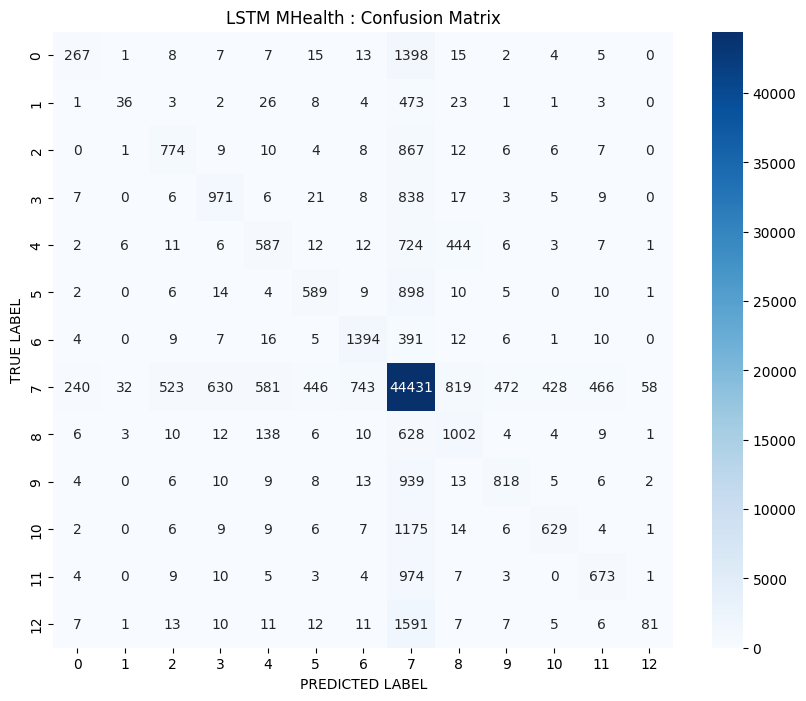

.....................................................!
Running for Traditional CNN.....................>>>>>
.....................................................!
Epoch 1/10
8750/8750 [==============================] - 10s 1ms/step - loss: 0.9303 - accuracy: 0.7327 - val_loss: 0.8526 - val_accuracy: 0.7479 - lr: 0.0010
Epoch 2/10
8750/8750 [==============================] - 10s 1ms/step - loss: 0.8298 - accuracy: 0.7496 - val_loss: 0.8222 - val_accuracy: 0.7529 - lr: 0.0010
Epoch 3/10
8750/8750 [==============================] - 10s 1ms/step - loss: 0.7962 - accuracy: 0.7588 - val_loss: 0.7989 - val_accuracy: 0.7638 - lr: 0.0010
Epoch 4/10
8750/8750 [==============================] - 10s 1ms/step - loss: 0.7742 - accuracy: 0.7677 - val_loss: 0.7753 - val_accuracy: 0.7661 - lr: 0.0010
Epoch 5/10
8750/8750 [==============================] - 10s 1ms/step - loss: 0.7569 - accuracy: 0.7739 - val_loss: 0.7679 - val_accuracy: 0.7737 - lr: 0.0010
Epoch 6/10
8750/8750 [========================

'CNN: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
0,0.64,0.38,0.47,1742.00
1,0.62,0.37,0.46,581.00
2,0.64,0.48,0.55,1704.00
3,0.65,0.55,0.60,1891.00
4,0.54,0.54,0.54,1821.00
5,0.68,0.41,0.51,1548.00
6,0.67,0.72,0.69,1855.00
7,0.82,0.92,0.87,49869.00
8,0.72,0.36,0.48,1833.00
9,0.63,0.57,0.60,1833.00


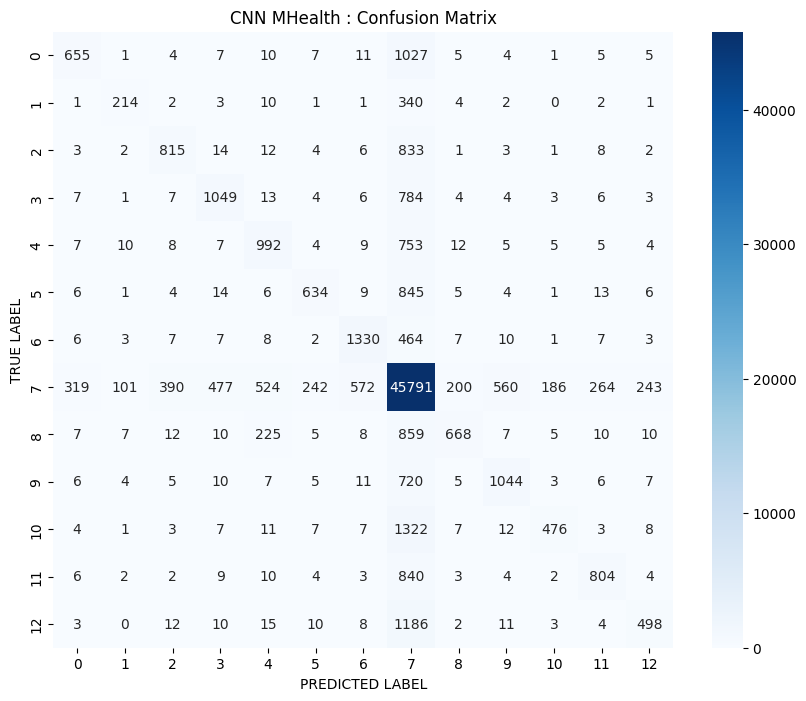

.....................................................!
Running for Traditional SVM.....................>>>>>
.....................................................!


'SVM: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
0,0.02,0.17,0.04,1742.00
1,0.03,0.38,0.06,581.00
2,0.11,0.26,0.16,1704.00
3,0.00,0.00,0.00,1891.00
4,0.00,0.00,0.00,1821.00
5,0.05,0.41,0.09,1548.00
6,0.00,0.00,0.00,1855.00
7,0.00,0.00,0.00,49869.00
8,0.00,0.00,0.00,1833.00
9,0.00,0.00,0.00,1833.00


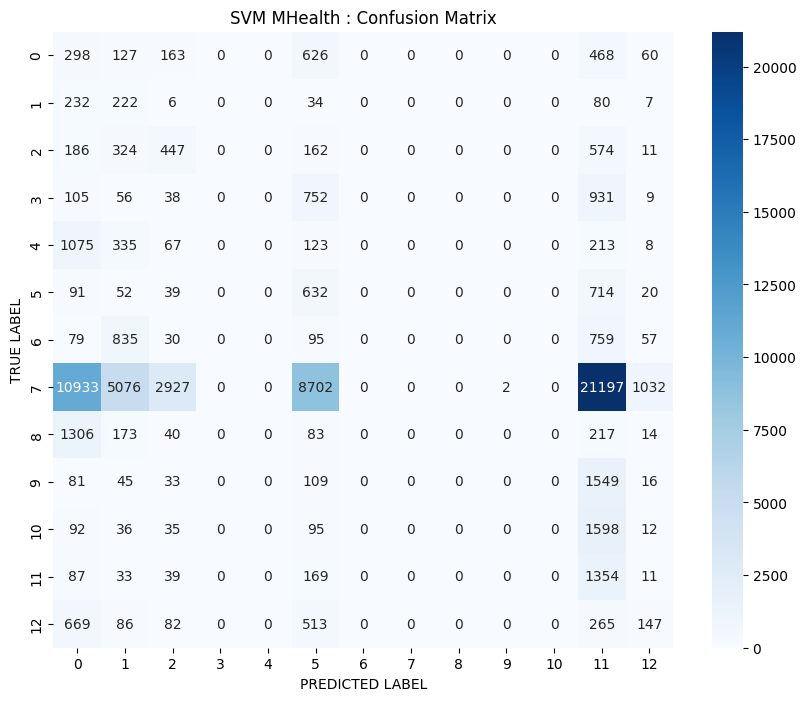

In [25]:
%run MHealth_TraditionalMethod_DataAugmentation.ipynb

Data types in the dataset:
 user                                int64
Activity                           object
acceleration_chest_x              float64
acceleration_chest_y              float64
acceleration_chest_z              float64
ECG_1                             float64
ECG_2                             float64
acceleration_left_ankle_x         float64
acceleration_left_ankle_y         float64
acceleration_left_ankle_z         float64
gyro_left_ankle_x                 float64
gyro_left_ankle_y                 float64
gyro_left_ankle_z                 float64
magnetometer_left_ankle_x         float64
magnetometer_left_ankle_y         float64
magnetometer_left_ankle_z         float64
acceleration_right_lower_arm_x    float64
acceleration_right_lower_arm_y    float64
acceleration_right_lower_arm_z    float64
gyro_right_lower_arm_x            float64
gyro_right_lower_arm_y            float64
gyro_right_lower_arm_z            float64
magnetometer_right_lower_arm_x    float64
magnet

'RANDOM FOREST: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
CLIMBING_STAIRS,0.88,0.19,0.32,274.00
CYCLING,0.78,0.24,0.36,89.00
FRONTAL_ELEVATION_OF_ARMS,0.84,0.67,0.74,265.00
JOGGING,0.84,0.76,0.80,300.00
JUMPING_FRONT_BACK,0.87,0.71,0.78,289.00
KNEES_BENDING,0.87,0.46,0.60,244.00
LYING_DOWN,0.83,0.91,0.87,292.00
NO_ACTIVITY,0.87,0.95,0.91,7833.00
RUNNING,0.81,0.79,0.80,285.00
SITTING_AND_RELAXING,0.80,0.86,0.83,286.00


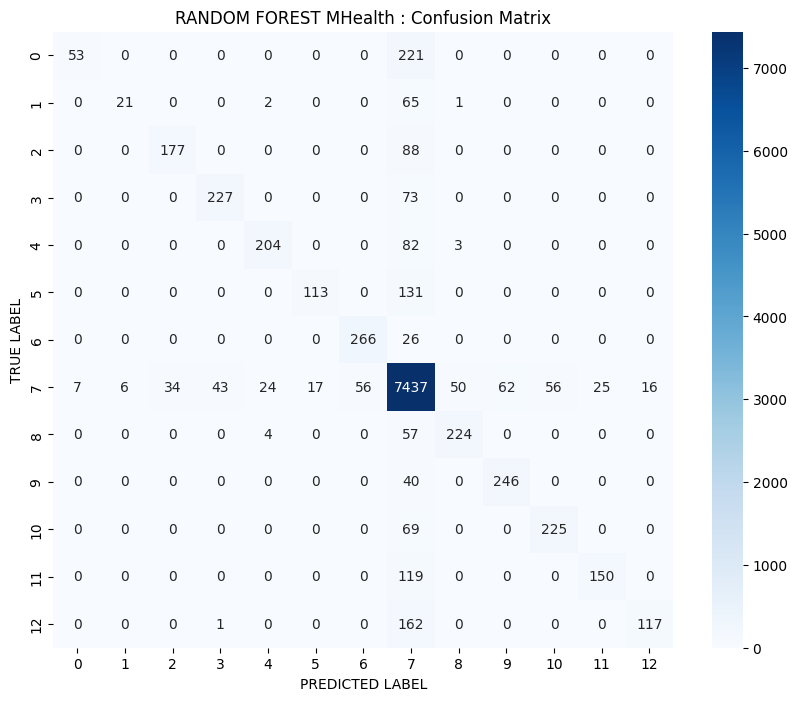

.....................................................!
Running for Advanced SVM.....................>>>>>
.....................................................!


'SVM: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
CLIMBING_STAIRS,0.00,0.00,0.00,274.00
CYCLING,0.47,0.16,0.24,89.00
FRONTAL_ELEVATION_OF_ARMS,0.70,0.39,0.50,265.00
JOGGING,1.00,0.00,0.01,300.00
JUMPING_FRONT_BACK,0.67,0.62,0.64,289.00
KNEES_BENDING,0.00,0.00,0.00,244.00
LYING_DOWN,0.69,0.93,0.79,292.00
NO_ACTIVITY,0.77,0.96,0.85,7833.00
RUNNING,0.73,0.63,0.68,285.00
SITTING_AND_RELAXING,0.00,0.00,0.00,286.00


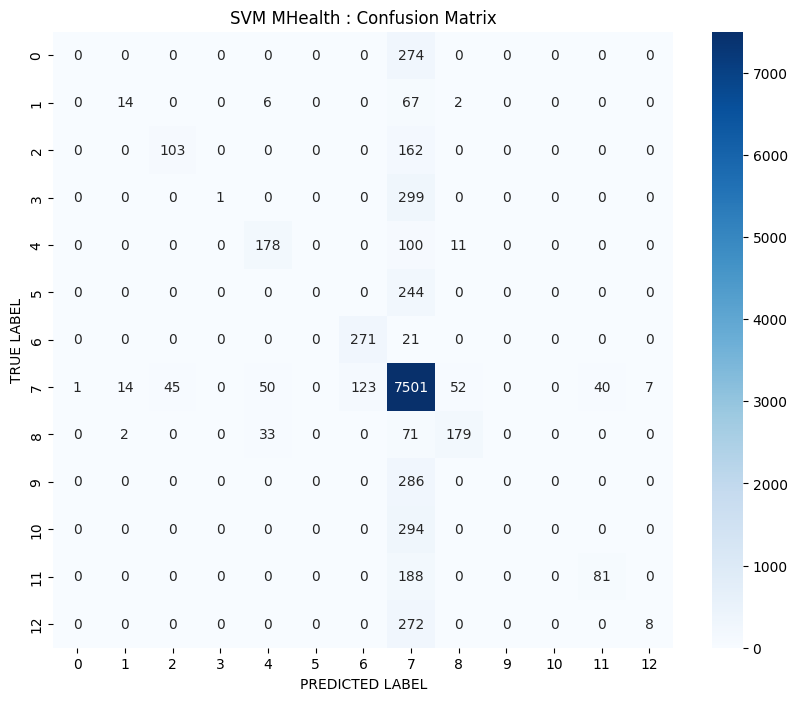

.....................................................!
Running for Advanced LSTM.....................>>>>>
.....................................................!
Epoch 1/10
550/550 [==============================] - 2s 2ms/step - loss: 0.8821 - accuracy: 0.7390 - val_loss: 0.7244 - val_accuracy: 0.7583
Epoch 2/10
550/550 [==============================] - 1s 2ms/step - loss: 0.6491 - accuracy: 0.7725 - val_loss: 0.6449 - val_accuracy: 0.7773
Epoch 3/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5910 - accuracy: 0.7882 - val_loss: 0.6224 - val_accuracy: 0.7810
Epoch 4/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.7982 - val_loss: 0.6052 - val_accuracy: 0.7911
Epoch 5/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.8053 - val_loss: 0.5886 - val_accuracy: 0.7890
Epoch 6/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5095 - accuracy: 0.8162 - val_loss: 0.5781 - val_acc

'LSTM: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
CLIMBING_STAIRS,0.48,0.29,0.36,274.00
CYCLING,0.39,0.17,0.24,89.00
FRONTAL_ELEVATION_OF_ARMS,0.76,0.57,0.65,265.00
JOGGING,0.69,0.61,0.65,300.00
JUMPING_FRONT_BACK,0.59,0.48,0.53,289.00
KNEES_BENDING,0.61,0.55,0.57,244.00
LYING_DOWN,0.71,0.84,0.77,292.00
NO_ACTIVITY,0.85,0.90,0.87,7833.00
RUNNING,0.57,0.51,0.54,285.00
SITTING_AND_RELAXING,0.72,0.90,0.80,286.00


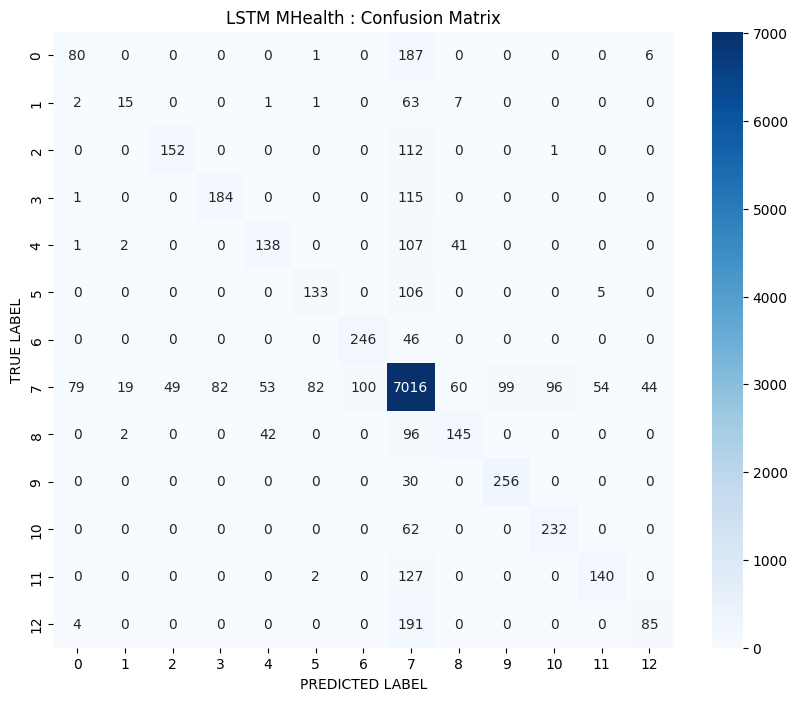

.....................................................!
Running for Advanced CNN.....................>>>>>
.....................................................!
Epoch 1/10
550/550 [==============================] - 2s 3ms/step - loss: 0.9496 - accuracy: 0.7338 - val_loss: 0.7617 - val_accuracy: 0.7559
Epoch 2/10
550/550 [==============================] - 1s 2ms/step - loss: 0.7128 - accuracy: 0.7597 - val_loss: 0.6927 - val_accuracy: 0.7666
Epoch 3/10
550/550 [==============================] - 1s 2ms/step - loss: 0.6545 - accuracy: 0.7699 - val_loss: 0.6803 - val_accuracy: 0.7699
Epoch 4/10
550/550 [==============================] - 1s 2ms/step - loss: 0.6250 - accuracy: 0.7766 - val_loss: 0.6291 - val_accuracy: 0.7732
Epoch 5/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5992 - accuracy: 0.7836 - val_loss: 0.6213 - val_accuracy: 0.7675
Epoch 6/10
550/550 [==============================] - 1s 2ms/step - loss: 0.5773 - accuracy: 0.7912 - val_loss: 0.6092 - val_accu

'CNN: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
CLIMBING_STAIRS,0.56,0.12,0.20,274.00
CYCLING,0.57,0.18,0.27,89.00
FRONTAL_ELEVATION_OF_ARMS,0.75,0.60,0.67,265.00
JOGGING,0.70,0.58,0.63,300.00
JUMPING_FRONT_BACK,0.57,0.54,0.55,289.00
KNEES_BENDING,0.70,0.47,0.56,244.00
LYING_DOWN,0.73,0.86,0.79,292.00
NO_ACTIVITY,0.82,0.93,0.87,7833.00
RUNNING,0.68,0.51,0.58,285.00
SITTING_AND_RELAXING,0.76,0.42,0.54,286.00


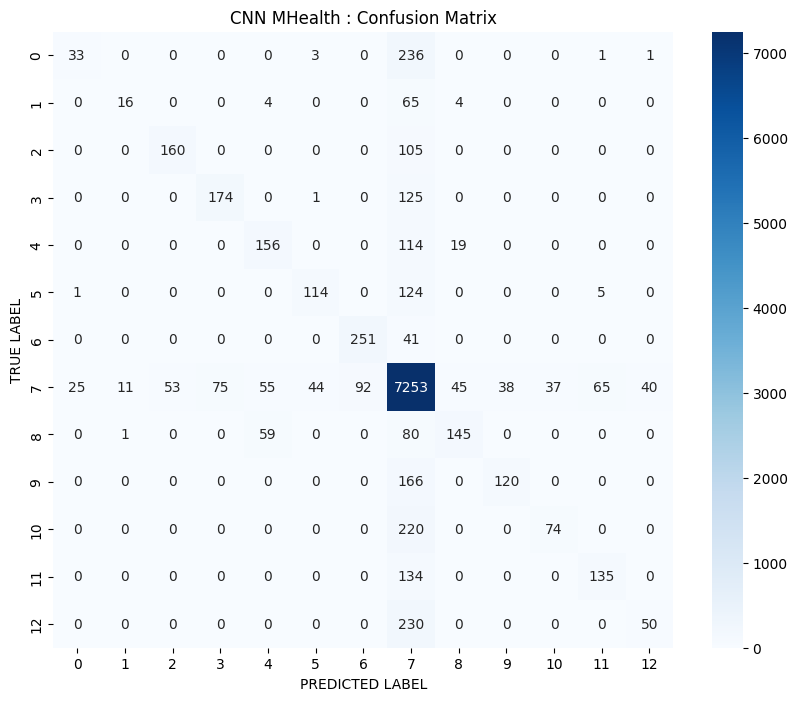

Epoch [10/100], Loss: 0.0
Epoch [20/100], Loss: 0.0
Epoch [30/100], Loss: 0.0
Epoch [40/100], Loss: 0.0
Epoch [50/100], Loss: 0.0
Epoch [60/100], Loss: 0.0
Epoch [70/100], Loss: 0.0
Epoch [80/100], Loss: 0.0
Epoch [90/100], Loss: 0.0
Epoch [100/100], Loss: 0.0
Shape of X_train: (40000, 562)
Shape of X_val: (10000, 562)
..........................TRAINING CPC...........................!
.....................................................!
Running for Advanced RANDOM FOREST.....................>>>>>
.....................................................!


'RANDOM FOREST: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
CLIMBING_STAIRS,0.67,0.03,0.06,255.00
CYCLING,0.50,0.03,0.05,75.00
FRONTAL_ELEVATION_OF_ARMS,0.75,0.49,0.59,239.00
JOGGING,0.74,0.34,0.46,289.00
JUMPING_FRONT_BACK,0.72,0.40,0.52,276.00
KNEES_BENDING,0.80,0.22,0.35,229.00
LYING_DOWN,0.83,0.98,0.90,257.00
NO_ACTIVITY,0.81,0.95,0.87,7103.00
RUNNING,0.75,0.62,0.67,273.00
SITTING_AND_RELAXING,0.75,0.92,0.82,249.00


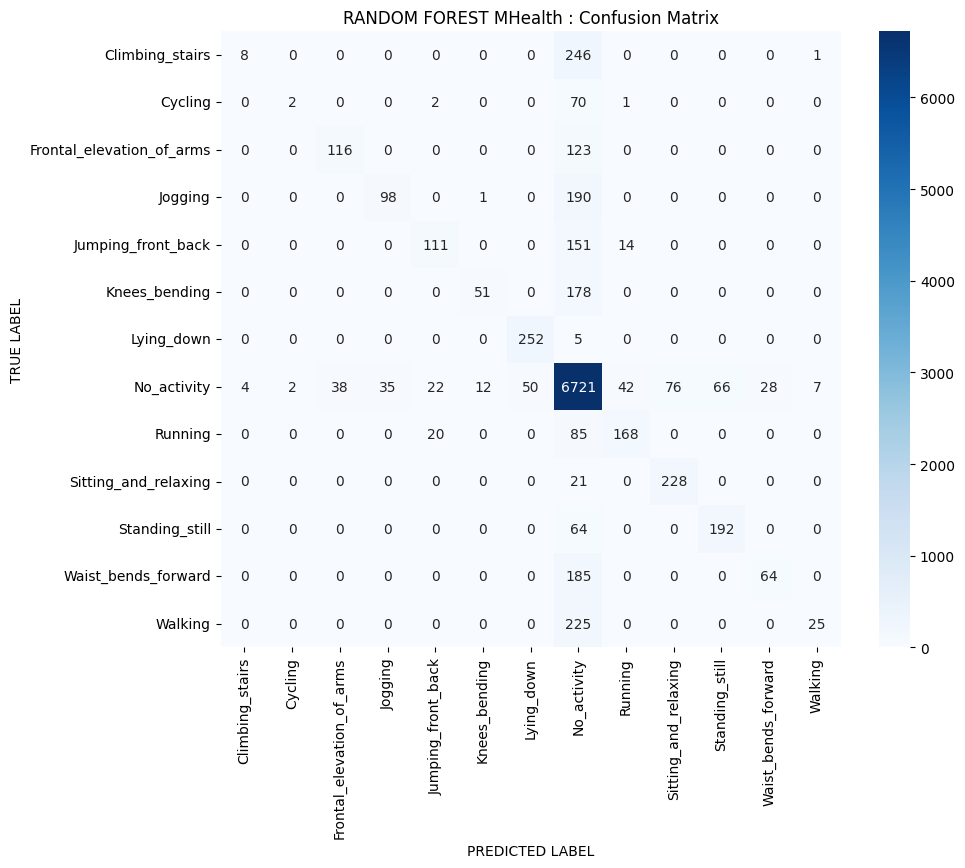

.....................................................!
Running for Advanced SVM.....................>>>>>
.....................................................!


'SVM: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
CLIMBING_STAIRS,0.74,0.16,0.26,255.00
CYCLING,0.46,0.23,0.30,75.00
FRONTAL_ELEVATION_OF_ARMS,0.71,0.57,0.63,239.00
JOGGING,0.70,0.46,0.56,289.00
JUMPING_FRONT_BACK,0.67,0.61,0.64,276.00
KNEES_BENDING,0.84,0.33,0.47,229.00
LYING_DOWN,0.74,1.00,0.85,257.00
NO_ACTIVITY,0.81,0.93,0.87,7103.00
RUNNING,0.76,0.69,0.72,273.00
SITTING_AND_RELAXING,0.68,0.59,0.63,249.00


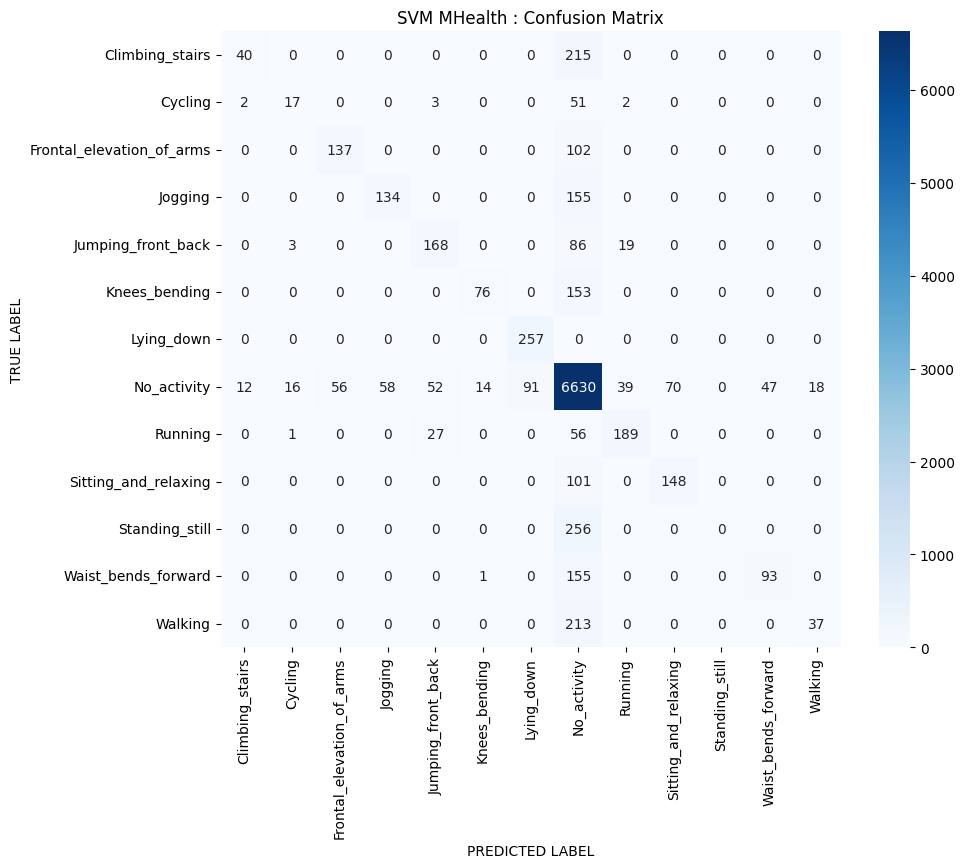

.....................................................!
Running for Advanced LSTM.....................>>>>>
.....................................................!
Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 0.8250 - accuracy: 0.7398 - val_loss: 0.6671 - val_accuracy: 0.7551
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6053 - accuracy: 0.7679 - val_loss: 0.6106 - val_accuracy: 0.7706
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 0.5520 - accuracy: 0.7813 - val_loss: 0.5970 - val_accuracy: 0.7666
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.5189 - accuracy: 0.7892 - val_loss: 0.5710 - val_accuracy: 0.7795
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4909 - accuracy: 0.7960 - val_loss: 0.5680 - val_accuracy: 0.7770
Epoch 6/10
500/500 [==============================] - 1s 3ms/step - loss: 0.4663 - accuracy: 0.8074 - val_loss: 0.5690 - val_acc

'LSTM: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
CLIMBING_STAIRS,0.45,0.40,0.42,255.00
CYCLING,0.33,0.19,0.24,75.00
FRONTAL_ELEVATION_OF_ARMS,0.66,0.69,0.67,239.00
JOGGING,0.60,0.62,0.61,289.00
JUMPING_FRONT_BACK,0.60,0.54,0.57,276.00
KNEES_BENDING,0.68,0.47,0.56,229.00
LYING_DOWN,0.74,1.00,0.85,257.00
NO_ACTIVITY,0.86,0.87,0.86,7103.00
RUNNING,0.69,0.63,0.66,273.00
SITTING_AND_RELAXING,0.70,0.94,0.80,249.00


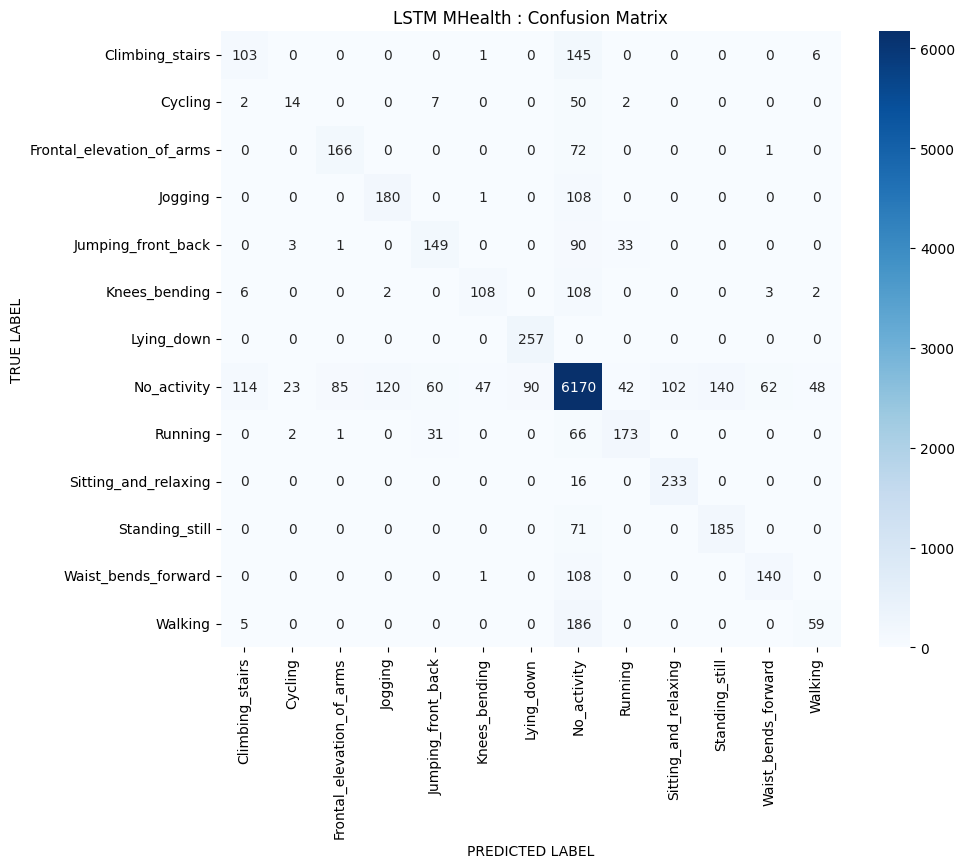

.....................................................!
Running for Advanced CNN.....................>>>>>
.....................................................!
Epoch 1/10
500/500 [==============================] - 14s 27ms/step - loss: 0.7842 - accuracy: 0.7469 - val_loss: 0.6647 - val_accuracy: 0.7600
Epoch 2/10
500/500 [==============================] - 14s 27ms/step - loss: 0.5846 - accuracy: 0.7761 - val_loss: 0.6055 - val_accuracy: 0.7751
Epoch 3/10
500/500 [==============================] - 13s 27ms/step - loss: 0.5157 - accuracy: 0.7990 - val_loss: 0.5883 - val_accuracy: 0.7796
Epoch 4/10
500/500 [==============================] - 14s 27ms/step - loss: 0.4673 - accuracy: 0.8094 - val_loss: 0.6212 - val_accuracy: 0.7641
Epoch 5/10
500/500 [==============================] - 14s 27ms/step - loss: 0.4270 - accuracy: 0.8236 - val_loss: 0.5628 - val_accuracy: 0.7914
Epoch 6/10
500/500 [==============================] - 14s 27ms/step - loss: 0.3857 - accuracy: 0.8406 - val_loss: 0.572

'CNN: Classification Report.'

,PRECISION,RECALL,F1-SCORE,SUPPORT
CLIMBING_STAIRS,0.45,0.36,0.40,255.00
CYCLING,0.29,0.23,0.25,75.00
FRONTAL_ELEVATION_OF_ARMS,0.68,0.59,0.63,239.00
JOGGING,0.61,0.47,0.53,289.00
JUMPING_FRONT_BACK,0.62,0.51,0.56,276.00
KNEES_BENDING,0.53,0.61,0.56,229.00
LYING_DOWN,0.75,1.00,0.86,257.00
NO_ACTIVITY,0.86,0.86,0.86,7103.00
RUNNING,0.71,0.73,0.72,273.00
SITTING_AND_RELAXING,0.71,0.96,0.82,249.00


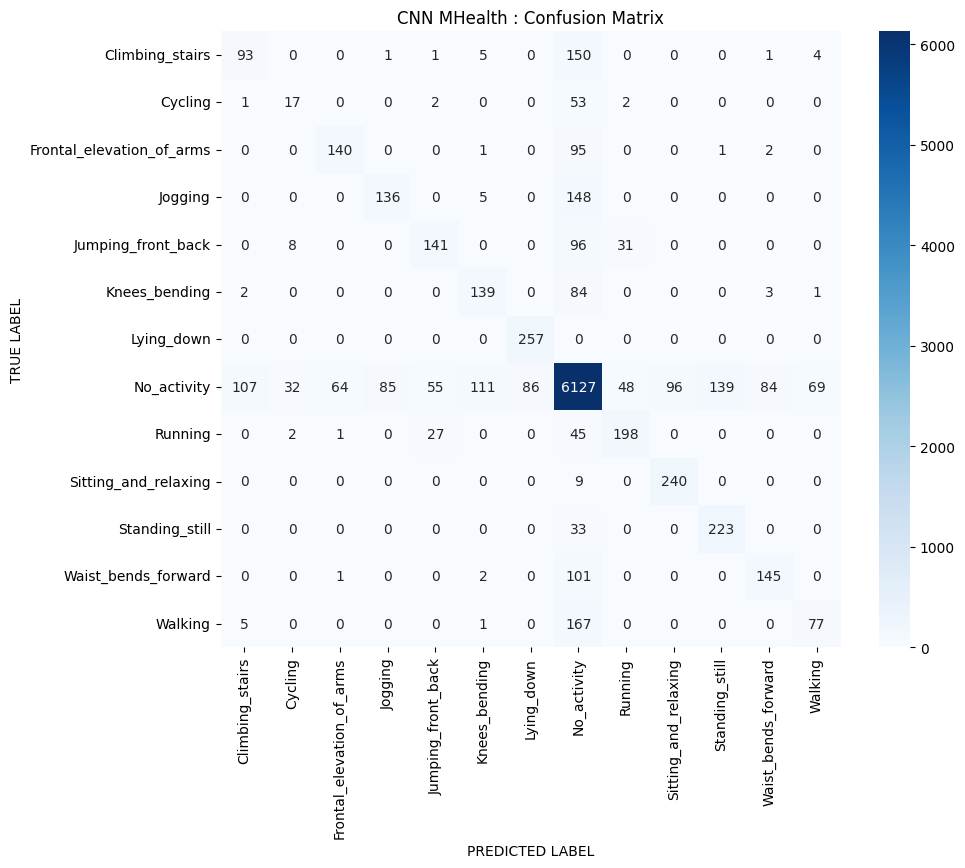

In [26]:
%run MHealth_AdvancedMethods_DataAugmentation.ipynb